In [4]:
import pandas as pd 

df = pd.read_csv('./data/labeling.csv')

train = df[:-1500]
test = df[-1500:]

len(train), len(test)

(7974, 1500)

   label  count
0     -1   1356
1      0    588
2      1   6030


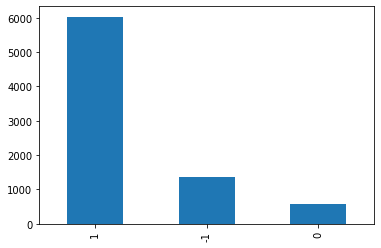

In [9]:
%matplotlib inline 
import matplotlib.pyplot as plt

train['label'].value_counts().plot(kind='bar')
print(train.groupby('label').size().reset_index(name='count'))

   label  count
0     -1    224
1      0     78
2      1   1198


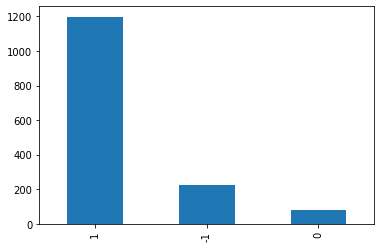

In [10]:
test['label'].value_counts().plot(kind='bar')
print(test.groupby('label').size().reset_index(name='count'))

In [11]:
# 불용어 로드
url = 'https://raw.githubusercontent.com/chaerui7967/stock_predict_news_and_youtube/master/Sentiment_Analysis/data/stopwords_ver1.txt'
stopwords = list(pd.read_csv(url, header=None)[0])

In [ ]:
import konlpy
from konlpy.tag import Okt
okt = Okt()
X_train = [] 
for sentence in train['text']: 
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    temp_X = [word for word in temp_X if len(word) > 1] # 불용어 제거 
    X_train.append(temp_X) 

X_test = [] 
for sentence in test['text']:
    temp_X = [] 
    temp_X = okt.morphs(sentence, stem=True) # 토큰화 
    temp_X = [word for word in temp_X if not word in stopwords]
    temp_X = [word for word in temp_X if len(word) > 1] # 불용어 제거 
    X_test.append(temp_X)

In [ ]:
print('train', X_train[:3])
print('test', X_test[:3])

In [ ]:
from keras.preprocessing.text import Tokenizer 
max_words = 35000
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print("최대 길이 : ", max(len(l) for l in X_train))
print("평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()


print("최대 길이 : ", max(len(l) for l in X_test)) 
print("평균 길이 : ", sum(map(len, X_test))/ len(X_test)) 
plt.hist([len(s) for s in X_test], bins=50) 
plt.xlabel('length of Data') 
plt.ylabel('number of Data') 
plt.show()

In [ ]:
import numpy as np 
y_train = [] 
y_test = [] 

for i in range(len(train_data['UpDown'])): 
    if train_data['UpDown'].iloc[i] == 1: 
        y_train.append([0, 0, 1]) 
    elif train_data['UpDown'].iloc[i] == 0:
        y_train.append([0, 1, 0]) 
    elif train_data['UpDown'].iloc[i] == -1: 
        y_train.append([1, 0, 0]) 

for i in range(len(test_data['UpDown'])): 
    if test_data['UpDown'].iloc[i] == 1: 
        y_test.append([0, 0, 1]) 
    elif test_data['UpDown'].iloc[i] == 0: 
        y_test.append([0, 1, 0]) 
    elif test_data['UpDown'].iloc[i] == -1: 
        y_test.append([1, 0, 0]) 

y_train = np.array(y_train) 
y_test = np.array(y_test)

In [ ]:
from keras.layers import Embedding, Dense, LSTM 
from keras.models import Sequential 
from keras.preprocessing.sequence import pad_sequences 

max_len = 100 

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
model = Sequential() 
model.add(Embedding(max_words, 100)) 
model.add(LSTM(128)) 
model.add(Dense(3, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [ ]:
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.1)

In [ ]:
model.evaluate(X_test,y_test)